In [1]:
# This is routing demo using osmnx and openstreetmap

import numpy as np
import osmnx as ox
import networkx as nx
import folium

import matplotlib.pyplot as plt

#Enable inline plotting of maps
%matplotlib inline

print (ox.__version__)
ox.config(log_console=True, use_cache=True)

0.11


In [2]:
#Define the study area
places = ['Champaign, Illinois','Urbana, Illinois']

In [3]:
#Note - this may take some time...
# Choose one type of network
#[ 'all_private','all','drive','drive_service', 'bike','walk']:#

G = ox.graph_from_place(places, network_type='all_private')

#The step give projects to UTM 
#ox.plot_graph(ox.project_graph(G));
#ox.plot_graph(G);
ox.plot_graph(G, fig_height=20, fig_width=20, edge_color='black')

filenames = 'Urban-Champaign-Net'
ox.save_graph_shapefile(G, filename=filenames)

ox.save_graphml(G, filename='Urban-Champaign-Net.graphml')


In [4]:
#origin = ox.utils.geocode('2012 S Orchard St,Urbana, IL')
#destination = ox.utils.geocode('1301 W Green St, Urbana, IL')
origin = (40.097468, -88.214171)
destination =(40.10948505, -88.2260316492452)

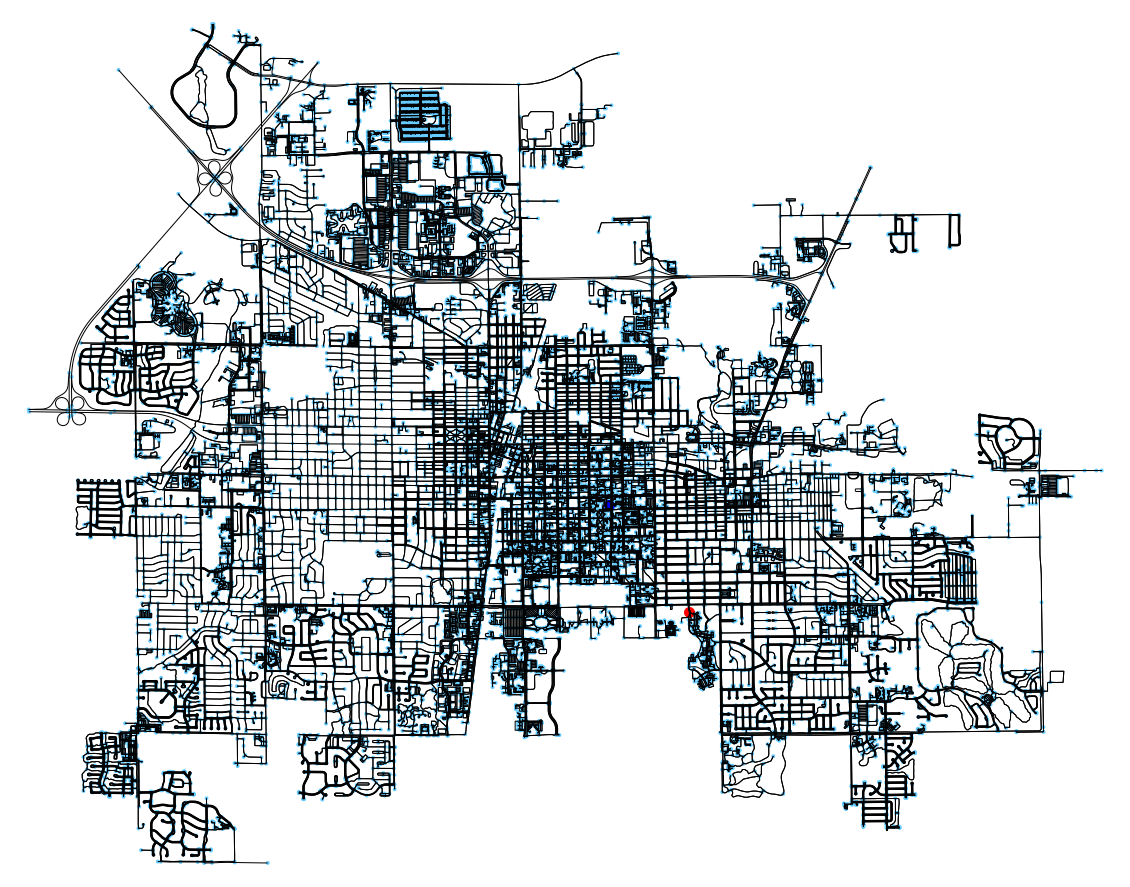

In [6]:
# Show the origin point and destination point on the map
fig, ax = ox.plot_graph(G, fig_height=20, fig_width=20, 
                        show=False, close=False, 
                        edge_color='black')

ax.scatter(origin[1], origin[0], c='red', s=100)
ax.scatter(destination[1], destination[0], c='blue', s=100)

plt.show()

In [7]:
# get the nearest network node
origin_node =  ox.get_nearest_node(G, origin) 
destination_node = ox.get_nearest_node(G, destination )

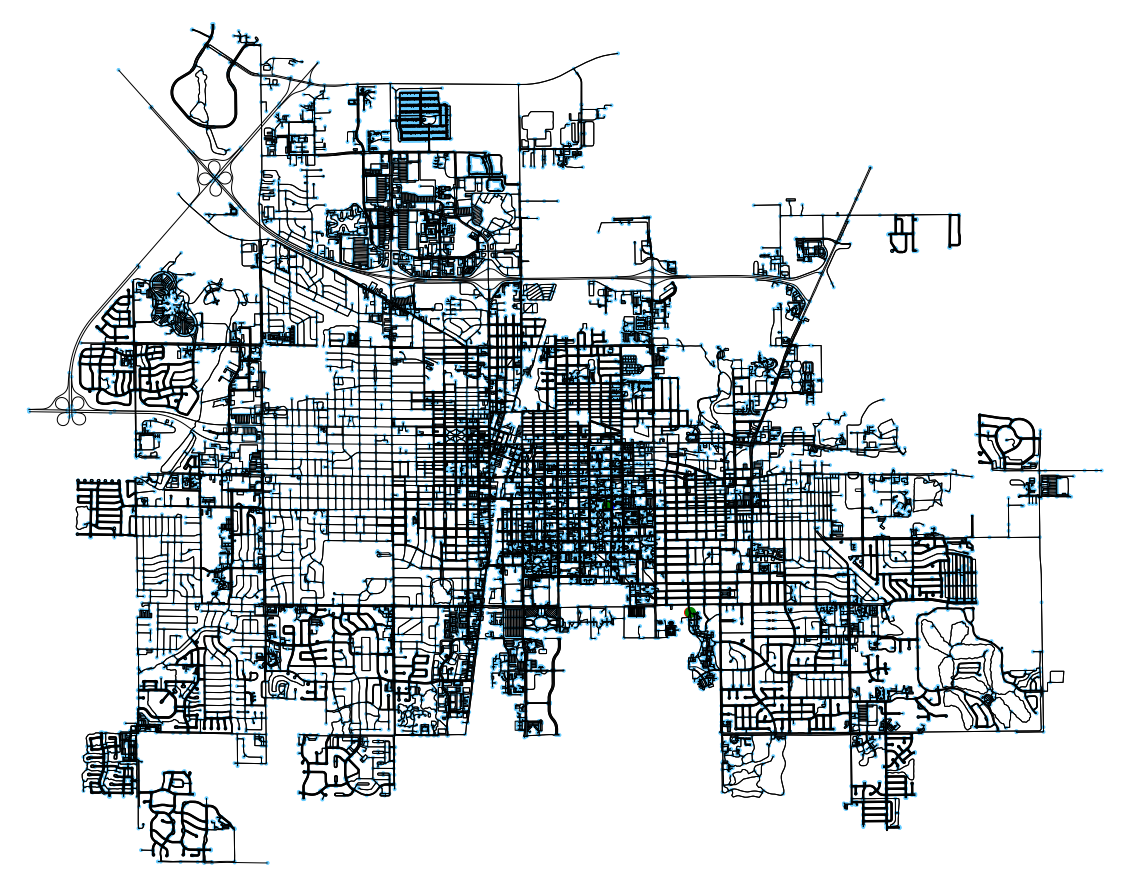

In [8]:
#Show the origin_node and the destination_node
fig, ax = ox.plot_graph(G, fig_height=20, fig_width=20, 
                        show=False, close=False, 
                        edge_color='black')

ax.scatter(origin[1], origin[0], c='red', s=100)
ax.scatter(destination[1], destination[0], c='blue', s=100)

ax.scatter(G.nodes[origin_node]['x'], G.nodes[origin_node]['y'], c='green', s=100)
ax.scatter(G.nodes[destination_node]['x'], G.nodes[destination_node]['y'], c='green', s=100)

plt.show()

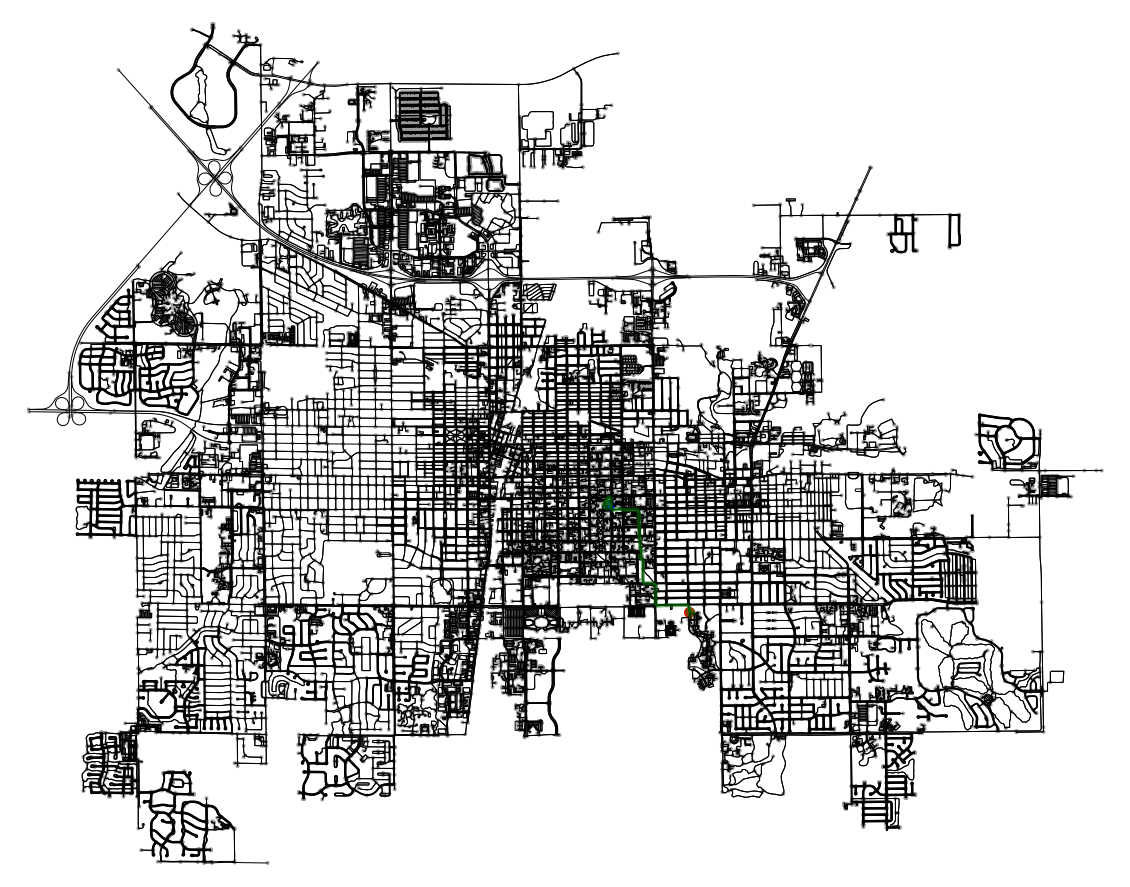

In [9]:
route = nx.shortest_path(G, origin_node, destination_node)


fig, ax = ox.plot_graph_route(G, route, fig_height=20, fig_width=20, 
                    show=False, close=False, 
                    edge_color='black',
                    orig_dest_node_color='green',
                    route_color='green')

ax.scatter(origin[1], origin[0], c='red', s=100)
ax.scatter(destination[1], destination[0], c='blue', s=100)

plt.show()

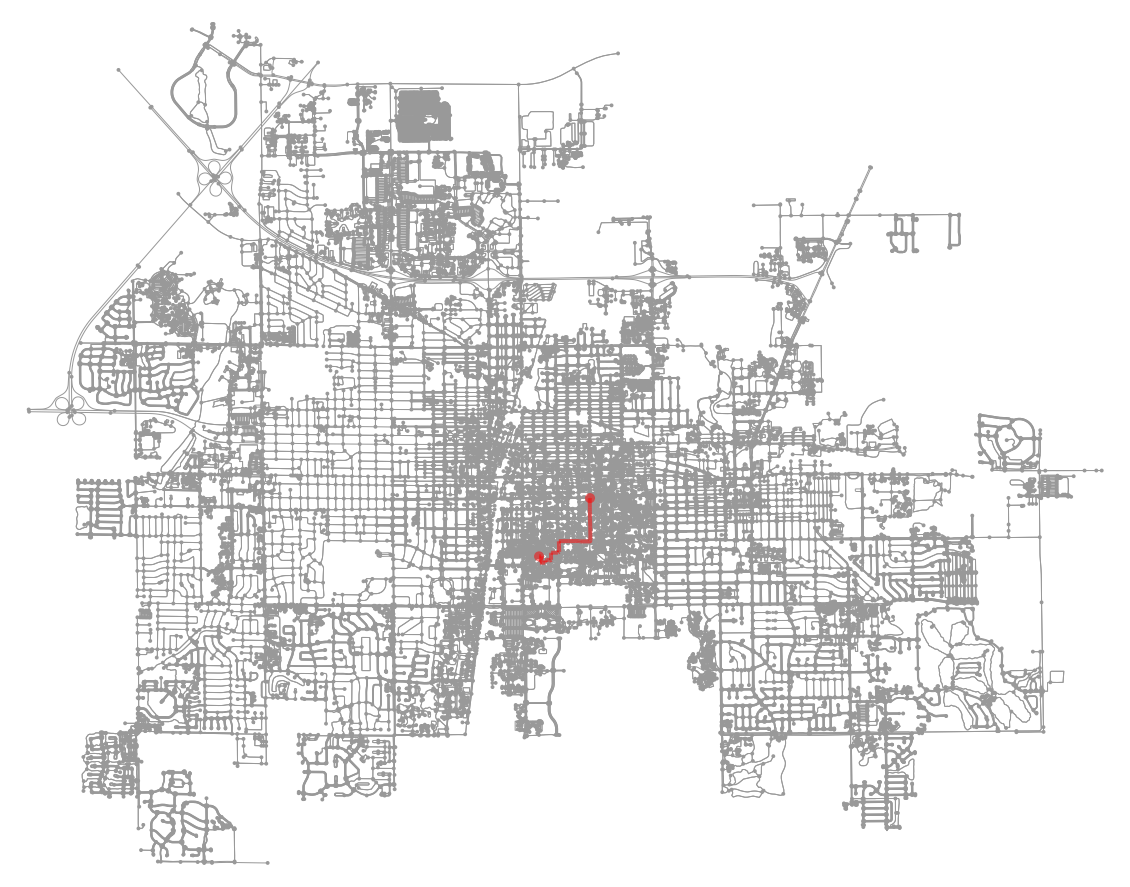

(<Figure size 1440x1440 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f62c20d0780>)

In [10]:
#Using osmnx to compute the shortest path between two random nodes along road networks
route = nx.shortest_path(G, np.random.choice(G.nodes()), np.random.choice(G.nodes()))
#route = nx.shortest_path(G, np.random(G.nodes), np.random(G.nodes))
ox.plot_graph_route(G, route, fig_height=20, fig_width=20)
